In [1]:
# Load packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings


warnings.filterwarnings("ignore")


In [2]:
# Load dataset

df = pd.read_csv('/kaggle/input/boston-housing-dataset/BostonHousing.csv')

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# Check the shape of the dataset

df.shape

(506, 14)

In [4]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Checking null values

df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df1 = df.dropna()

print(df1.isna().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


**Model Building**

*Regression Model*

In [9]:
# Load model packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

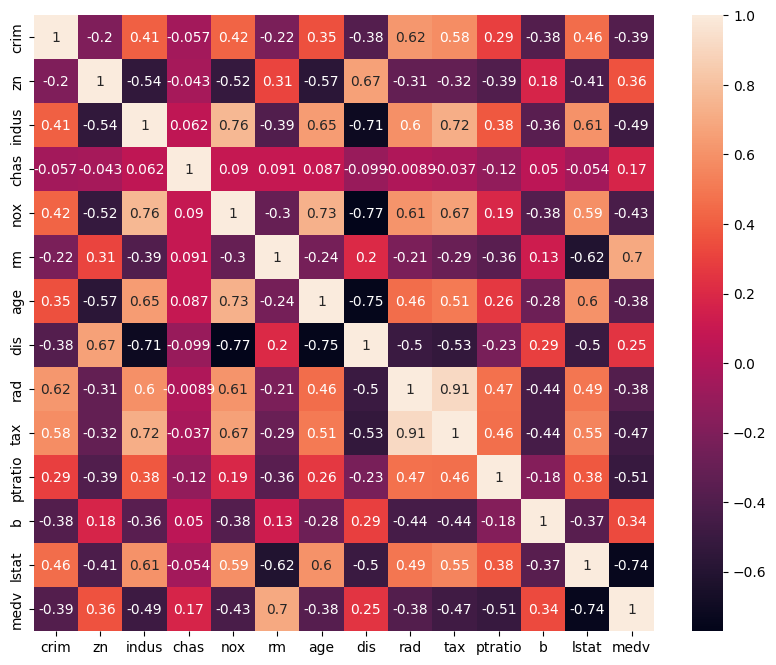

In [10]:
# Heatmap to check correlation

plt.figure(figsize=(10, 8))
sns.heatmap(data=df1.corr(), annot=True)
plt.show()

The heatmap shows the correlation between the variables. The independent variables are not highly correlated with each other and good for regression modeling.

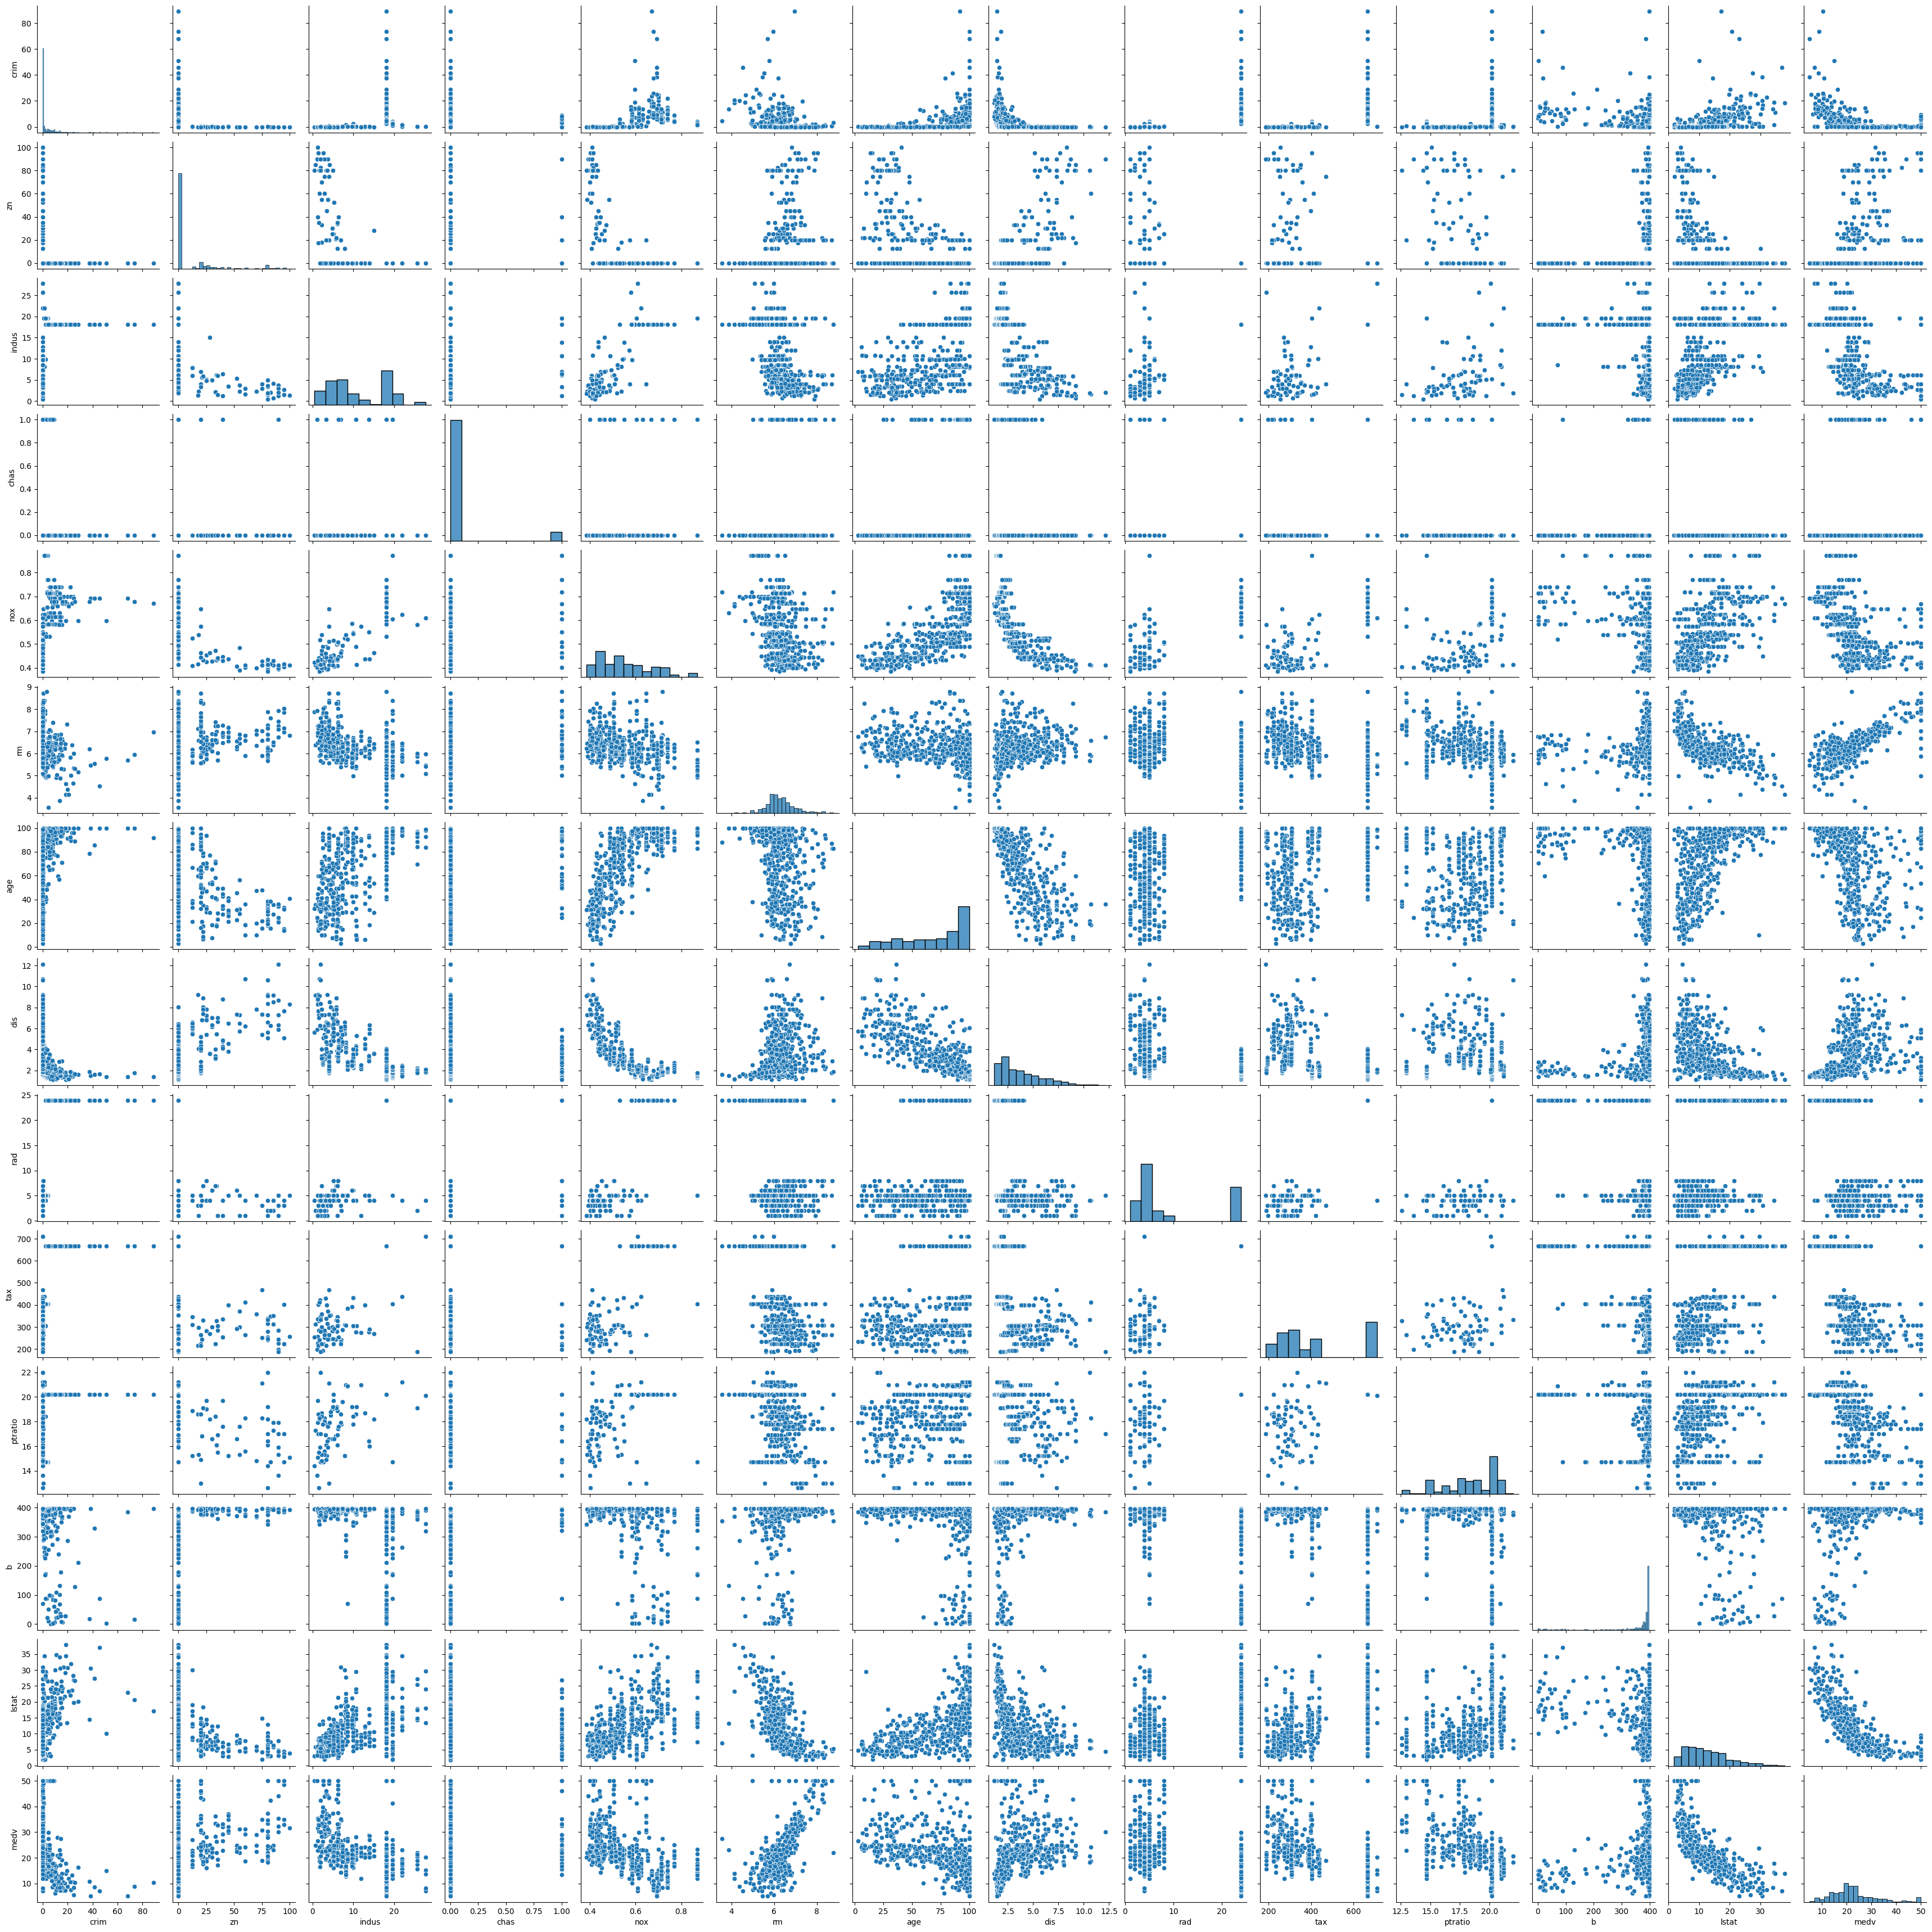

In [11]:
sns.pairplot(df1)

In [12]:
# Preparing for modeling

y = df1['medv']

X = df1[['rm', 'dis', 'b', 'lstat']]

In [13]:
X.head()

,rm,dis,b,lstat
0,6.575,4.0900,396.90,4.98
1,6.421,4.9671,396.90,9.14
2,7.185,4.9671,392.83,4.03
3,6.998,6.0622,394.63,2.94
4,7.147,6.0622,396.90,5.33


In [14]:
# Train the model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
model = LinearRegression().fit(X_train, y_train)

In [16]:
model.coef_

array([ 6.05532101, -0.3373146 ,  0.01318377, -0.56403248])

In [17]:
model.intercept_

-12.022202693365454

In [18]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred)

[26.07331473 30.00535442 24.79950194 22.16527963 29.93591603 23.78749015
 -3.52856577 37.40110968 21.25237021 25.15548565 22.22396455 20.44138194
 26.01758322 12.5388597  22.713594   25.62193951 14.43720044 19.03900365
 27.43705094 28.87004245 18.20338313 22.74953772 13.95272696 19.05303612
 17.14624695 14.1241967  18.50206122 16.8752218  27.6661867  26.54919517
 13.76569413 18.24117172 22.86036084 32.56887325 25.2191057   9.65701
 17.87167109 17.11254458 28.67280633 26.329048   19.48389872  6.54523482
 14.94490363 38.91958121 22.11682695 25.26091798 18.16358424 18.47319766
 11.34893353 17.26242275 30.83229457 28.70739009 34.51687346 13.8949995
 23.40109915 22.98672191 25.33489946 29.78923348 29.40734143 30.98431962
 27.3798109  16.62553046 17.58995934 18.61586166 29.36259182 24.176333
 20.01179014 16.69356431 30.51190264 22.15727506  5.82189332 17.50884431
  8.47388215 14.02326639 35.0236705  20.73529287 12.70983013 22.72693588
 19.36635602 23.22957769 33.44622031 26.34354608 20.82491

In [20]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 4.038859092063408
Mean Squared Error (MSE): 43.46854445975524
R-squared (R²): 0.5399120187382657


*XGboost Regression Model*

In [21]:
# Preparing data

df2 = df.dropna()

print(df2.isna().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [22]:
# Preparing for modeling

y = df2['medv']

X = df2.drop('medv', axis = 1)

In [23]:
# Perform split operations

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
# Modeling
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(random_state=0)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)


In [25]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 2.7035353534269015
Mean Squared Error (MSE): 24.76024794890101
R-squared (R²): 0.719157516004479


In [26]:
# Comparing Metrics

table = pd.DataFrame({'Model': ['Linear Regression', 'Xgboost Regression'],
                     'Mean Absolute Error (MAE)': [4.038859092063408, mae],
                     'Mean Squared Error (MSE)': [43.46854445975524, mse],
                     'R-squared (R²)': [0.5399120187382657, r2]
                         }
                     )
table

,Model,Mean Absolute Error (MAE),Mean Squared Error (MSE),R-squared (R²)
0,Linear Regression,4.038859,43.468544,0.539912
1,Xgboost Regression,2.703535,24.760248,0.719158


The table provides the performance metrics for two different regression models: Linear Regression and XGBoost Regression.

1**Mean Absolute Error (MA**:
   - For Linear Regression: 4.038859
   - For XGBoost Regression: 2.703535
   - MAE represents the average absolute difference between the predicted values and the actual values. A lower MAE indicates better performance  . In this case, the XGBoost Regression model has a lower MAE, suggesting that it provides more accurate predictions on average compared to Linear Regression.
2. **Mean Squared Erro(MSE)**:
   - For Linear Regression: 43.468544
   - For XGBoost Regression: 24.760248
   - MSE represents the average of the squares of the errors between predicted and actual values. Like MAE, a lower MSE indicates better performance. The XGBoost Regression model also has a lower MSE, further indicating its superior performance in minimizing prediction errs.

3. **R-uared (R²)**:
   - For Linear Regression: 0.539912
   - For XGBoost Regression: 0.719158
   - R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit. Higher R-squared values indicate better fit. The XGBoost Regression model has a significantly higher R-squared value, indicating that it explains a larger portion of the variance in the dependent variable compared to Linear Regression.

In summary, based on these metrics, the XGBoost Regression model outperforms the Linear Regression model in terms of accuracy and explanatory power. It has lower mean absolute error, lower mean squared error, and a higher R-squared value, suggesting that it provides better predictions and explains more variance in the target variable.